# Chemical Reactor Stability and Sensitivity

For this module and the discussion of stability and sensitivity we will be focused on a continuously stirred tank reactor (CSTR), with a simple reaction of reactant A forming product B.

$A-->B$

With chemical reactions it often becomes important to monitor the steady state conversion of the reaction as well as the reactor temperature, which can be used (along with feed flowrate) to control the reaction rate, k.

To approach this problem we will first examine and reduce the mass balance and 1st law of thermodynamics using a series of assumptions about the reactor. We will then utilize computational resources to solve these reduced equations for both a transient and steady state solutions.

First examine the material balance (MB) for reactant A:


The change of mass for reactant A(
$
M_A
$)
is equal to the flow rate of feed into the reactor by the concentration of the feed(
$
Q_fC_{Af}
$)
minus the flow rate out of the reactor by the concentration of reactant in the tank(
$
QC_A
$)
,and the reaction rate of the reactor by the reactor volume(
$
R_AV_R
$)

The mass of reactant A can be rewriten as
\begin{equation*}
\frac{d(M_A)}{dt} =\frac{d(C_AV_r)}{dt}
\end{equation*}


Therefore the MB equation becomes:
\begin{equation*}
\frac{d(C_AV_r)}{dt} = Q_fC_{Af} - QC_A + R_AV_R
\end{equation*}




The production rate RA is given by:
\begin{equation*}
R_A = -k(T)C_A
\end{equation*}

and at steady state the MB simplifies to:
\begin{equation*}
0 = C_{Af} - C_A+k\tau C_A
\end{equation*}

Note that $\tau$, the residence time is equivalent to the Volume of the reactor divided by the feed flowrate.

\begin{equation*}
\tau = \frac{V}{Q}
\end{equation*}

This brings up an important method for controlling the end product of a reaction. When considering multiplicity of steady states having a method for controlling which stable state the reaction moves to is critical, and one way to achieve this is through manipulation of the feed flowrate. However, it is often better to consider the flowrate in terms of the residence time, and because the volume of the reactor remains constant any variation of the flowrate is inversely proportional to the residence time.


Due to the fluctuations in reactor temperature, the Arrhenius equation is solved for to take into account the temperature dependency of the chemical reaction rate. 


\begin{equation*}
k(T) = k_me^{-E(\frac{1}{T}-\frac{1}{T_m})}
\end{equation*}

Where $k_m$ is the reaction rate constant, E is the activation energy, T is the termperature of the reactor, and $T_m$ is the mean temperature.

Now that we have a simplified form of the MB equation we will approach the 1st Law of Thermodynamics, given the system below:

<img src="https://drive.google.com/uc?export=view&id=1aQlqgVLk0Bf3Kev_gGtlfLs65-3lBuOi"/>

# First Law and Isothermal case

<font size="3">
Recall the 1st Law of thermodynamics:
<font size="2">
\begin{equation*}
\frac{d}{dt}(U+K+\Phi) =  m_0(h+k+\phi)_0 - m_1(h+k+\phi)_1 + Q +Ws+Wb
\end{equation*}
    
    

##Problem 1
<font size = "2">
    
Using the following assumptions, reduce the 1st Law equation.

 - steady state
 - rigid vessel $(\large\frac{dV}{dT}=0)$
 - U=H-PV
 - constant heat capacity of liquid: Cp(Tf-T)
 - single phase
 - incompressible fluid/constant pressure
 
For the final form of the equation make sure there are no terms for Q and V





##Solution 1
<font size = "2">

Assuming internal energy is dominant, with parameters for,
inflow: flowrate Qf, density ρf, enthalpy Hf
outflow: flowrate Q

\begin{equation*}
\frac{dU}{dt} =  Q_fρ_fH_f - QρH + (Q + W_s + W_b)
\end{equation*}

If we can assume that the work done by the shaft is negligible, and if we expand internal energy as U=H-PV then we have:
\begin{equation*}
\frac{dH}{dt} - V_r*\frac{dP}{dt} = Q_fρ_fH_f - QρH + Q
\end{equation*}

Given that it is single phase, we reconsider dH in terms of change in T, but not P or nj therfore   $dH = V_R \rho C_P dT +(1-\alpha T)V_RdP + Hdn$ becomes:

$dH = V_R \rho C_P dT$

Substituting gives:
\begin{equation*}
V_R \rho \frac{dT}{dt} = -\Delta H_R r V_R + c_f Q_f (H_f - H)+Q
\end{equation*}

If the heat capacity of the liquid is constant, we neglect the pressure effect of enthalpy and can simplify the change in enthalpy as $H_{jf}-H_j =C+{Pj}(T_f-T)$.

The steady state energy balance can then be reduced to:
\begin{equation*}
0 = -kC_AΔH_rV_r + Q_fρ_fCp(T_f-T) + U_A(T_a-T)
\end{equation*}

Assume adiabatic, and divide by the reactor volume
\begin{equation*}
0 = -kC_AΔH_r + \frac{Cp_s}{τ}(T_f-T)
\end{equation*}



***We began with the balance of mass and the balance of energy, and now we have two equations:***
\begin{equation*}
0 = C_{Af} - (1+kτ)C_A
\end{equation*}
\begin{equation*}
0 = -kC_AΔH_r + \frac{Cp_s}{τ}(T_f-T)
\end{equation*}
***With two unknowns:***


***The concentration of reactant A, CA***

***and the temperature of the reactor, T***



Therefore, we can go ahead and solve the two equations in python.

However, instead of solving:
\begin{equation*}
C_A(\tau)\;and\; T(\tau),\;for\;\tau\;varying\;from\;0\;\le\;\tau\;\le\;1000\;min
\end{equation*}

We will solve for:
\begin{equation*}
\tau(C_A)\;and\; T(C_A),\;for\;C_A\;varying\;from\;0\;\le\;C_A\;\le\;C_{Af}
\end{equation*}

It does not matter which way we solve it, in the end we will still plot:
\begin{equation*}
C_A(\tau)\;and\; T(\tau)
\end{equation*}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
import scipy.optimize as opt
from scipy.integrate import odeint
from numpy import exp

Tf = 298
Tm = 298
Cp = 4
CAf = 2
km =0.001
E = 8*10**3
rho = 10**3
Uo = 0
rhof = rho

Cps = rhof *Cp


We will first look at an isothermal case:


##Problem 2
<font size = "2">


Start by setting ΔHr = 0 (isothermal), and find CA($\tau$) and T($\tau$) by solving $\tau(C_A)$ and T($C_A$).

Plot CA($\tau$) and T($\tau$) 

A useful metric in problems like this is conversion $(x)$ which defines the % of material A converted

$\large x=\frac{Ca_i - Ca}{Ca_i}$

Conversion is solved for:

\begin{equation*}
x = \frac{k\tau}{1+k\tau}
\end{equation*}

Plot conversion as a function of residence time using the variables initialized above.

In [ ]:
dHr = 0

size = 10000

x = np.zeros(size)
k = np.zeros(size)
T_T = np.zeros(size)
tau_T = np.zeros(size)
CA_T = np.linspace(0.995*CAf,0.002*CAf,size) 

x0 = (0.00001,Tf)

for t in range(0,size):

    def f(variables) :
        (tau,T) = variables
        CA = CA_T[t]

        first_eq = CAf - (1 + (km*np.e**(-E*(1/T-1/Tm)))*tau)*CA            
        second_eq = (Cps*(Tf-T)) - (km*np.e**(-E*(1/T-1/Tm)))*CA*dHr*tau
        return [first_eq, second_eq]
    
    solution = opt.fsolve(f, x0 )
    x0 = solution

    
    T_T[t] = solution[1]
    tau_T[t] = solution[0]


Text(0.5, 1.0, 'CA vs tau')

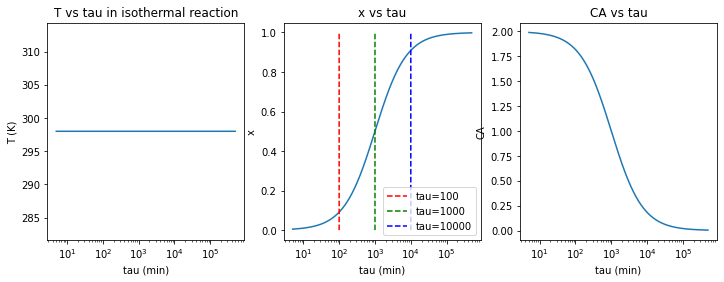

In [ ]:
k = km*np.e**(-E*(1/T_T-1/Tm))
x = (k*tau_T)/(1+k*tau_T)

fig = plt.figure(2,figsize=(12,4))
plt.subplot(131)
plt.semilogx(tau_T,T_T)
plt.xlabel('tau (min)')
plt.ylabel('T (K)')
plt.title('T vs tau in isothermal reaction')
plt.subplot(132)
plt.semilogx(tau_T,x)
plt.xlabel('tau (min)')
plt.ylabel('x')
plt.title('x vs tau')
plt.plot(100*np.ones(2*size-2),np.linspace(0,1,2*size-2),'r--',label='tau=100')
plt.plot(1000*np.ones(2*size-2),np.linspace(0,1,2*size-2),'g--',label='tau=1000')
plt.plot(10000*np.ones(2*size-2),np.linspace(0,1,2*size-2),'b--',label='tau=10000')
plt.legend(loc='best')
plt.subplot(133)
plt.semilogx(tau_T,CA_T)
plt.xlabel('tau (min)')
plt.ylabel('CA')
plt.title('CA vs tau')




Questions:

1) Why can we expect the output of the first graph to look like this based on the assumptions we made before calculating?

2) What is the relationship between $\large \tau$ and $\large x$?

3) What would a graph of the concentration of reactant B vs residence time look like?

$\large\frac{d{C_A}}{dt} = \frac{{C_Af}-{C_A}}{\tau} - k{C_A}$

$\large\frac{dT}{dt} = \frac{U_0}{C_ps} ({T_a}-{T}) + \frac{{T_f}-T}{\tau} - \frac{dH_r}{C_ps} {k}{C_A}$

Examining the plot of conversion vs residence time you can see that there is a single steady state solution for each value of $\large \tau$, however, this is not always the case as we will see in the next few examples.

This also becomes more intuitive when looking at the transient solution when examining different residence times.

Solution 2

1) Because the reaction is isothermal, meaning constant Temp

2) There is a positive correlation, and Tau is increasing most near x =.5 and slowest near x=0 and 1

3) It would look like the third graph here, but flipped, as reactant A converts directly to product B

#Exothermic and Multiple Steady States


##Problem 3
<font size = '2'>
  
  Now we will look at the non-isothermal case, where the reaction is either endothermic or exothermic
  
  (hint: vary $\Delta Hr$)
 

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'conversion vs tau')

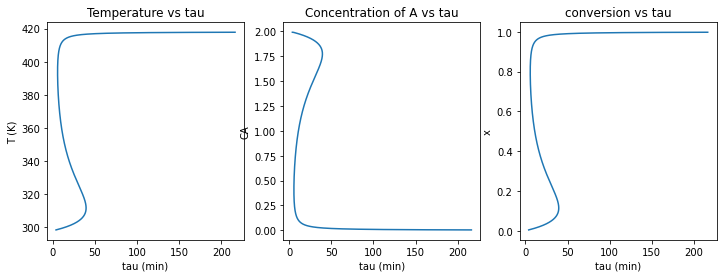

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
import scipy.optimize as opt
from scipy.integrate import odeint
from numpy import exp

###########################################
dHr = -240000 #@param {type:"slider", min:-320000, max:-50000, step:10000}
###########################################

Tf = 298
Tm = 298
Cp = 4
CAf = 2
km =0.001
E = 8*10**3
rho = 10**3
Uo = 0
rhof = rho

Cps = rhof *Cp
size = 10000

x = np.zeros(size)
k = np.zeros(size)
T_T = np.zeros(size)
tau_T = np.zeros(size)
CA_T = np.linspace(0.995*CAf,0.002*CAf,size)

x0 = (0.00001,Tf)

for t in range(0,size-1):
    #st1 = timeit.default_timer()
    
    def f(variables) :
        (tau,T) = variables
        CA = CA_T[t]
        
        first_eq = CAf - (1 + (km*np.e**(-E*(1/T-1/Tm)))*tau)*CA
        second_eq = (Cps*(Tf-T)) - (km*np.e**(-E*(1/T-1/Tm)))*CA*dHr*tau
        return [first_eq, second_eq]
    
    solution = opt.fsolve(f, x0 )
    x0 = solution
    
    T_T[t] = solution[1]
    tau_T[t] = solution[0]
    
k[1:-1] = km*np.e**(-E*(1/T_T[1:-1]-1/Tm))
x[1:-1] = (k[1:-1]*tau_T[1:-1])/(1+k[1:-1]*tau_T[1:-1])

fig = plt.figure(2,figsize=(12,4))
plt.subplot(131)

plt.plot(tau_T[1:-1],T_T[1:-1])
plt.xlabel('tau (min)')
plt.ylabel('T (K)')
plt.title('Temperature vs tau')

plt.subplot(132)

plt.plot(tau_T[1:-1],CA_T[1:-1])
plt.xlabel('tau (min)')
plt.ylabel('CA')
plt.title('Concentration of A vs tau')

plt.subplot(133)

plt.plot(tau_T[1:-1],x[1:-1])
plt.xlabel('tau (min)')
plt.ylabel('x')
plt.title('conversion vs tau')

Questions

1) What happens with a large negative $\Delta Hr$ term to the graphs above?

2) Why can this be a problem for large scale industrial reactor systems?



##Solution 3
<font size = "2">
If the reaction is more exothermic than -10 kJ/mol than there appears a trough, and there are now more than one steady state condition.

This is known as steady-state multiplicity.

This is a problem because at the same external conditions of flowrate, temperature, and concentration, the reactor may be converting significantly less than optimally.


##Problem 4
<font size = "2">
The isothermal problem we did had a single steady state solution, however for the exothermic problem above we can see many steady states, especially for a residence time between 2.5 nad 30.9 minutes. So let's look at how initial conditions will influence the final state of the reactor. 
    
Set tau=10, and vary the CA0 and T0. What is happening? Can you identify the stable state conditions?

Text(0.5, 0, 'tau (min)')

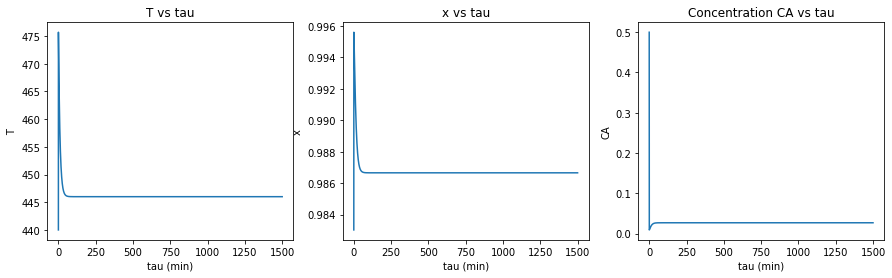

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
import scipy.optimize as opt
from scipy.integrate import odeint
from numpy import exp

Tf = 298
Tm = 298
Cp = 4
CAf = 2
km =0.001
E = 8*10**3
rho = 10**3
Uo = 0
rhof = rho

Cps = rhof *Cp

dHr = -3*10**5


size = 10000
tau = 10

Ta = 298
tf = 15*tau*10
t = np.linspace(0,tf,size)
x = np.zeros(size)
k = np.zeros(size)


Uo = 0
Vr = 1
rhof = rho

CA0 = 0.5 #@param {type:"slider", min:0.1, max:1, step:0.1}
T0 = 440  #@param {type:"slider", min:350, max:500, step:10}


Cps = rhof *Cp

def model(CA_T_trans,t):
    CA,T = CA_T_trans
    k = km*np.e**(-E*(1/T-1/Tm))
  
    dCAdt = (CAf - CA)/tau - k*CA
    dTdt = (Uo/Cps)*(Ta-T) + (Tf-T)/tau - (dHr/Cps)*k*CA
    
    return dCAdt, dTdt

init_states = [CA0,T0]

CA_T_trans = odeint(model,init_states,t)

outputVar = (CA_T_trans[:,:])

k[:] = km*np.exp(-E*(1/outputVar[:,1]-1/Tm))
x[:] = (k*tau)/(1+k[:]*tau)

fig = plt.figure(1,figsize=(15,4))
plt.subplot(133)
plt.plot(t,outputVar[:,0])
plt.xlabel('tau (min)')
plt.ylabel('CA')
plt.title('Concentration CA vs tau')

plt.subplot(131)
plt.plot(t,outputVar[:,1])
plt.ylabel('T')
plt.title('T vs tau')
plt.xlabel('tau (min)')

plt.subplot(132)
plt.plot(t,x)
plt.ylabel('x')
plt.title('x vs tau')
plt.xlabel('tau (min)')

Questions

1) is it possible to get a stable conversion of 50% ? why or why not?

2) Identify The conditions for x, tau, and T where the reactor "ignites"

3) Identify the conditions for x and tau where the reactor "extincts"

4) What does this behavior imply for industrial application?


##Solution 4
<font size = "2">
    
Depending on the initial conditions of the reactor, the reaction will approach one of the two attractors.

For an enthalpy change of -30 kJ/mol:

at x= 0.09, tau = 30.9, T=311 is the ignintion point

at x = 0.81, tau = 2.5 is the extinction point

This shows how critical it is to have control over your reactor. Even at the same operating conditions the reactor could have have either low conversion or near complete conversion based on the conditions the reactor began operating at. If the reactor began operating at a high concentration of reactant, and low temperature then the reaction approaches the ignition point, however, if the reactor began at a high conversion, and high operating temperature then it approaches the extinction point.

#Extinction/Ignition and Van Heerden


##Problem 5
  
<font size = '2'>
    Lets look at some points of interest on the steady state plot of the reactor with $\Delta Hr$ = -30 kJ
    

    


<img src="https://drive.google.com/uc?export=view&id=1UGgRo_TsmkzsbJJ5U7BCWgxIOaxwLis4"/>


  
  <font size = '2'>
To evaluate the points above we will examine Van Heerden diagrams for each of the stratifications based on varying residence times. Van Heerden diagrams are steady state plots of heat production and removal in the CSTR. The heat removal curve is linear, while the heat production curve is higher order. The peaks of the curves represent potential stable points, while the region between is highly unstable. Intersections represent steady-state operating points, and an exothermic reaction can have mulptiple steady-state points (multiplicity).

Producing the Van Heerden diagrams is simple enough. Start by substituting the mass balance of CA into the energy balance:
\begin{equation*}
0 = \frac{-k}{1+k\tau}C_{Af}ΔH_r + \frac{Cp_s}{\tau}(T_f-T)
\end{equation*}

The first term is the heat-gerneration rate (Qg)

The second term is the heat-removal rate (Qr)

Stability is obtained when these rates are equivalent, and plot.

Start by plotting the heat generation and production curves, and vary tau to determine the residence time for the first set of intersecting points.

##Problem 6
<font size = "2">
    
Plot the Van Heerden diagram for tau = 1.79.


Text(0.5, 1.0, 'Van Heerden Diagram( Heat vs Temperature)')

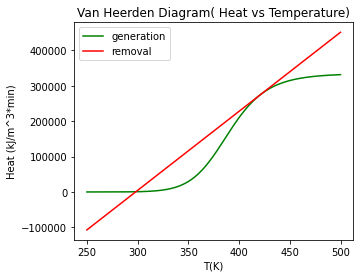

In [ ]:
Tf = 298
Tm = 298
Cp = 4
CAf = 2
km =0.001
E = 8*10**3
rho = 10**3
DHr = -3*10**5
Uo = 0
rhof = rho

Cps = rhof *Cp

tau = 1.79

import numpy as np 
import matplotlib.pyplot as plt

Qg = np.zeros((1000))
Qr = np.zeros(1000)
T = np.zeros(1000)
k =np.zeros(1000)
CA =np.zeros(1000)
x =np.zeros(1000)

T = np.linspace((250),(500),1000)
time = np.linspace(0,tau,1000)
k = km*np.e**(-E*(1/T[:]-1/Tm))

CA = CAf/(1+k[:]*tau)
x = (k[:] *tau)/(1+k[:]*tau)
Qg[:] = (-k[:]/(1+k[:]*tau)) * CAf *DHr
Qr[:] = (Cps/tau)*(T[:]-Tf)

fig = plt.figure(5,figsize=(5,4))
plt.plot(T,Qg,'green',label='generation')
plt.plot(T,Qr,'red',label='removal')
plt.legend(loc='upper left')
plt.xlabel('T(K)')
plt.ylabel('Heat (kJ/m^3*min)');
plt.title('Van Heerden Diagram( Heat vs Temperature)')


<font size = '2'>

  This is the Van Heerden diagram coresponding to the graph in problem 5, with only the Jeat removal line of tau=1.79 displayed.
 

Questions:

1) What is the significance of the intesection points of the heat removal and the heat generation curve?

answer: the heat removal line lies tangent to heat generation at the extinction point where $\large \frac{d\tau}{dx}=0$, while the lower intersection represents a low conversion and low residence time

2) What is the relationship of residence time to this plot? What would happen if it were decreased (by increasing volumetric flow through reactor)?

answer: the slope of the heat removal curve increases when residence time decreases and the intersection representing the extinction point disappears.



#Problem 7

Text(335, 200000, 'ignition')

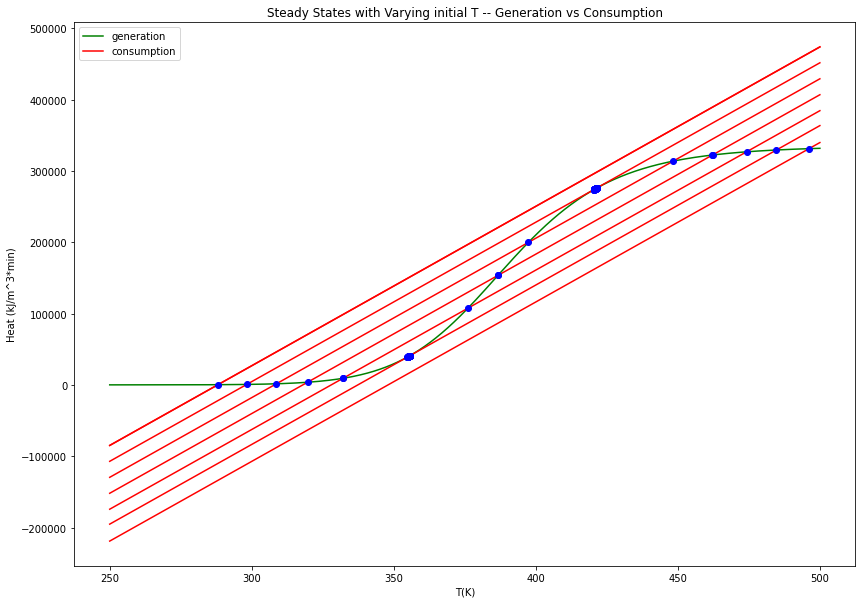

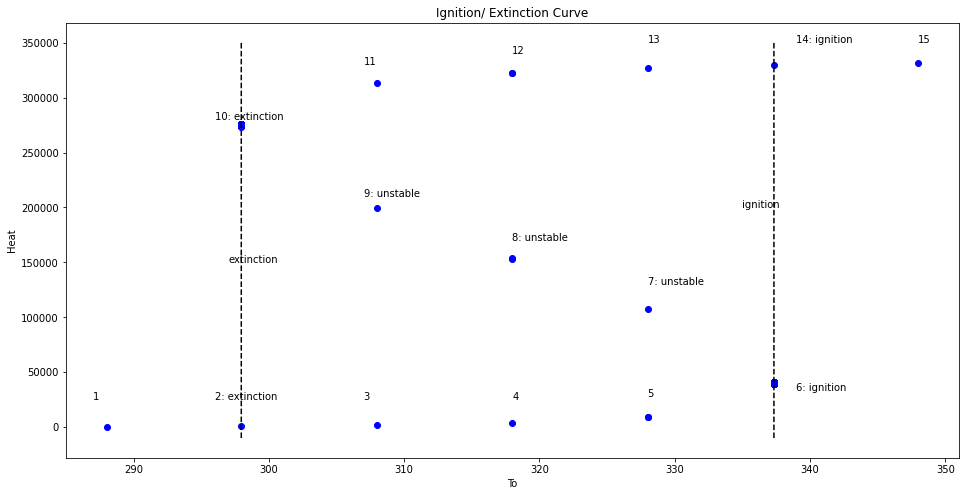

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Tf = [288,297.961,308,318,328,337.366,348] #evaluation temperatures
Tm = 298
Cp = 4
CAf = 2
km =0.001
E = 8*10**3
rho = 10**3
DHr = -3*10**5    #initializing values of heat equation
Uo = 0
rhof = rho
Cps = rhof *Cp
tau = 1.79         #residence-time variable

size = 10000
Qg = np.zeros(size)
Qr = np.zeros((size,7))
Tr = np.zeros(size)

k = np.zeros(size)
CA =np.zeros(size)
x =np.zeros(size)

T = np.linspace((250),(500),size)
time = np.linspace(0,tau,size)

k = km*np.e**(-E*(1/T[:]-1/Tm))
CA = CAf/(1+k[:]*tau)
x = (k[:] *tau)/(1+k[:]*tau)   #heat equation calculations

Qg[:] = (-k[:]/(1+k[:]*tau)) * CAf *DHr  #Heat generation calculation

for i in range (0,7):
  for j in range (0,size):
    Qr[j][i] = (Cps/tau)*(T[j]-Tf[i])

Ta = np.zeros((size,7))
Tb = np.zeros((size,7))

area = 30

for i in range (0,7):
  for j in range(0,size):
    if abs(Qg[j] - Qr[j][i]) < area:
      Ta[j][i] = T[j]
      Tb[j][i] = ((Cps/tau)*(Ta[j][i]-Tf[i]))
           
for i in range (0,size):
  Tb[i] = Tb[i].astype('float')
  Tb[i][Tb[i] == 0] = 'nan'
  Ta[i] = Ta[i].astype('float')
  Ta[i][Ta[i] == 0] = 'nan'

Qr = Qr.transpose()
Ta = Ta.transpose()
Tb = Tb.transpose()

#Van Heerden Plot
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(T,Qg,'green',label='generation')
plt.plot(T,Qr[0],'red',label='consumption')

for i in range (0,7):
    plt.plot(T,Qr[i],'red')
    plt.plot(Ta[i],Tb[i],'bo')

plt.axis = ([260,400,-100000,500000]) 
plt.legend(loc='upper left')
plt.title('Steady States with Varying initial T -- Generation vs Consumption')
plt.xlabel('T(K)')
plt.ylabel('Heat (kJ/m^3*min)')


Tc = np.zeros((7,size))
for i in range (0,7):
  Tc[i][:] = np.ones(len(Tb[i][:]))*Tf[i]

#Intial Temp vs Heat Plot
fig = plt.figure(2, figsize=(16,8))   
for i in range (0,7):
  plt.plot(Tc[i][:],Tb[i][:],'bo')

plt.title('Ignition/ Extinction Curve')
plt.xlabel('To')
plt.ylabel('Heat')


#Add vertical lines to graph, indicating ignition and extinction points 
#example of a line input:   plt.plot(5*np.ones(size),np.linspace(0,100,size),'k--')

#You can use the points below to label the points and identify the reaction progression
#Identify which points exist in an unstable steady state, and which points indicate ignition/extinction

plt.plot(337.336*np.ones(2*size-2),np.linspace(-10000,350000,2*size-2),'k--')
plt.plot(297.961*np.ones(2*size-2),np.linspace(-10000,350000,2*size-2),'k--')  
plt.text(287,25000,'1')
plt.text(296,25000,'2: extinction')
plt.text(307,25000,'3')
plt.text(318,25000,'4')
plt.text(328,28000,'5')
plt.text(339,33000,'6: ignition')
plt.text(328,130000,'7: unstable')
plt.text(318,170000,'8: unstable')              
plt.text(307,210000,'9: unstable')
plt.text(296,280000,'10: extinction')
plt.text(307,330000,'11')
plt.text(318,340000,'12')
plt.text(328,350000,'13')
plt.text(339,350000,'14: ignition')
plt.text(348,350000,'15')
plt.text(297,150000,'extinction')
plt.text(335,200000,'ignition')